# python解决吴恩达课后练习1 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 导入数据 

In [3]:
file_path = "ex1data1.txt"
df = pd.read_csv(file_path, header=None, names=["Population of city", "Profit"])
df.head()

,Population of city,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.shape

(97, 2)

## 数据可视化 

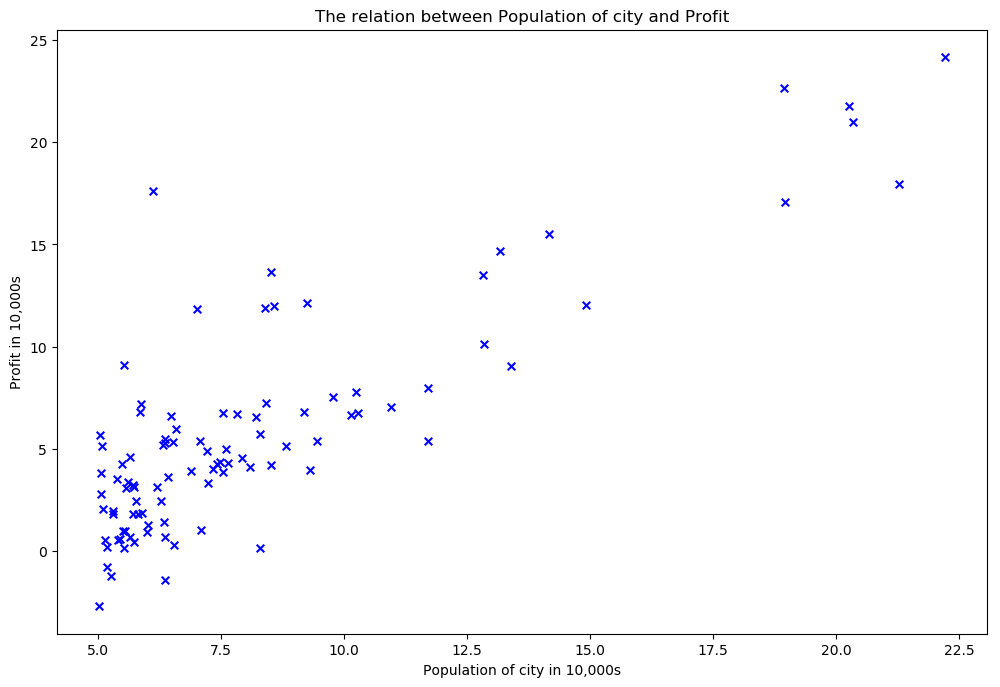

In [5]:
plt.figure(figsize=(12, 8), dpi=100)
plt.scatter(df["Population of city"], df["Profit"], s=30, c='b', marker='x')
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in 10,000s")
plt.title("The relation between Population of city and Profit")
plt.show()

## 为假设函数增加偏置量 

In [6]:
df.insert(0, "Ones", 1)
df.head()

,Ones,Population of city,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


## 训练集和测试集的划分 

In [7]:
X_train = df.iloc[0:72, 0:2].values
y_train = df.iloc[0:72, 2:3].values
X_test = df.iloc[72:, 0:2].values
y_test = df.iloc[72:, 2:3].values

## 代价函数 

In [8]:
def cost(X, y, theta):
    J = np.dot((np.dot(X_train, theta) - y_train).T , (np.dot(X_train, theta) - y_train))/(2 * X.shape[0])
    return J

## 梯度下降 

In [9]:
# 定义单次梯度下降时，theta的迭代
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    # theta有几个就更新几次
    for i in range(len(theta.ravel())):
            grad[i, 0] = np.dot(X[:, i].T, np.dot(X, theta) - y)/X.shape[0]
    return grad

In [10]:
# 定义迭代次数，每次更新gradient
def descent(X, y, theta, alpha, nums_iters):
    grad = np.zeros(theta.shape)
    costs = [cost(X, y, theta)]
    for i in range(nums_iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha * grad
        costs.append(cost(X, y, theta))
    return theta, costs, grad

## 输入初始参数 

In [11]:
theta = np.array([[0], [0]])
theta, costs, grad = descent(X_train, y_train, theta, alpha=0.00001, nums_iters=10000)

##  迭代循环过程中代价函数的可视化 

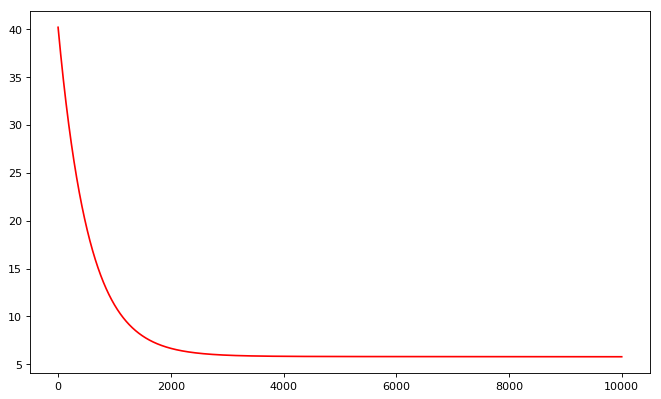

In [12]:
from itertools import chain
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(np.arange(len(costs)), list(chain.from_iterable(costs)), 'r')

## 训练结果的可视化 

In [13]:
grad

array([[ 0.61839251],
       [-0.06568555]])

In [14]:
theta

array([[0.01802302],
       [0.86338263]])

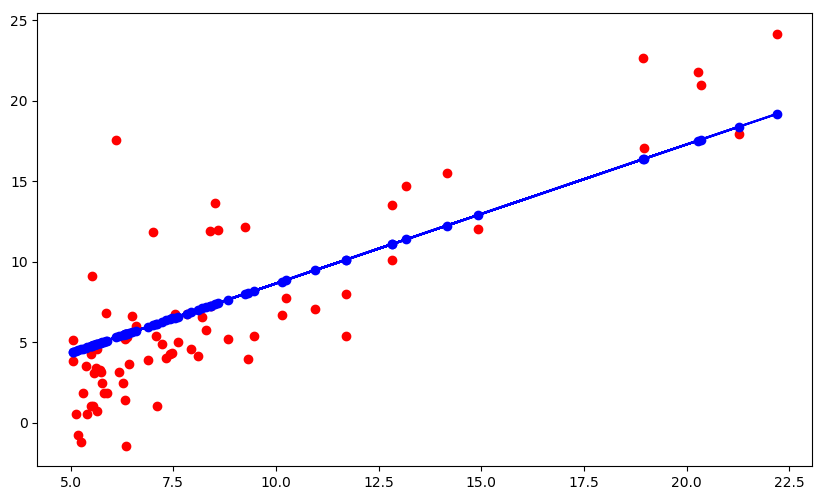

In [15]:
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(X_train[:, 1], y_train, color = 'red')
plt.plot(X_train[:, 1], np.dot(X_train, theta), 'bo-')

## 测试结果的可视化 

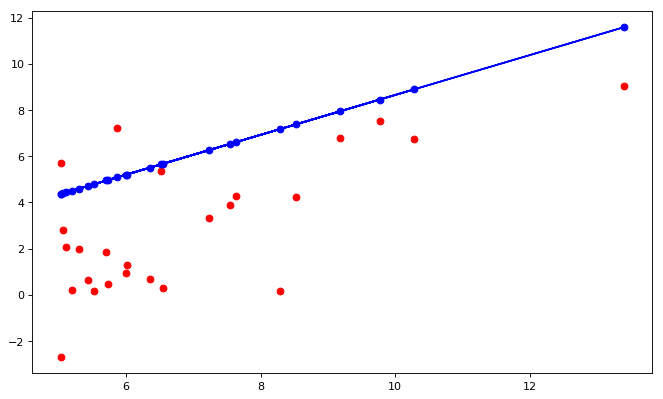

In [16]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(X_test[:, 1], y_test, color = 'red')
plt.plot(X_test[:, 1], np.dot(X_test, theta), 'bo-')